In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro, probplot
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [2]:
data=pd.read_csv("/home/ccp/Desktop/LR/archive/data/df_features.csv")

In [5]:
data.columns

Index(['Unnamed: 0', 'relationships', 'funding_rounds', 'funding_total_usd',
       'log_funding_total_usd', 'milestones', 'log_milestones',
       'avg_participants', 'log_avg_participants', 'age_funding_span',
       'age_milestone_span', 'funding_duration_days', 'lifetime_days',
       'relationships_per_round', 'milestones_per_year',
       'funding_per_participant', 'is_top500', 'labels', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD'],
      dtype='object')

 ##  Ordinary Least Squares (OLS) Regression vs. LinearRegression in Python: What's the Difference?

In [ ]:
#OLS
X = data[['funding_rounds','log_avg_participants','relationships','funding_duration_days','funding_per_participant']]
y = data['log_funding_total_usd']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame with original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)

# Add constant for intercept
X_train_scaled_df = sm.add_constant(X_train_scaled_df)

# Fit OLS model with DataFrame (with column names)
model = sm.OLS(y_train, X_train_scaled_df).fit()

print(model.summary())



                              OLS Regression Results                             
Dep. Variable:     log_funding_total_usd   R-squared:                       0.724
Model:                               OLS   Adj. R-squared:                  0.722
Method:                    Least Squares   F-statistic:                     383.1
Date:                   Sat, 24 May 2025   Prob (F-statistic):          1.46e-201
Time:                           12:39:36   Log-Likelihood:                -976.83
No. Observations:                    738   AIC:                             1966.
Df Residuals:                        732   BIC:                             1993.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

Intercept: 15.773357080615913
Coefficients:
  funding_rounds: -0.11260177446287373
  log_avg_participants: 0.47978075431467293
  relationships: 0.06198234990186524
  funding_duration_days: 0.19688284089196006
  funding_per_participant: 1.2912487308995315
R-squared on test set: 0.722039788156139
MSE on test set: 0.7078016599895944


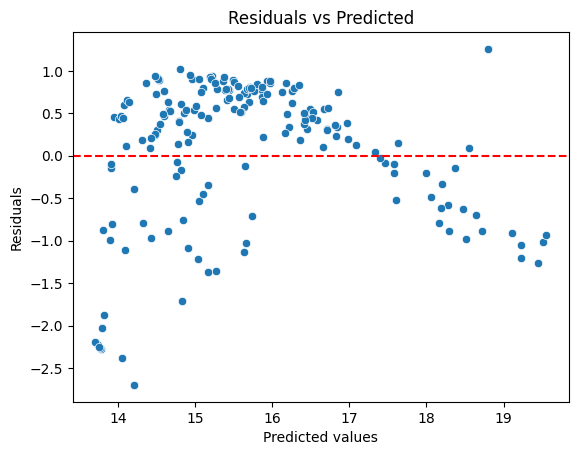

In [36]:

X = data[['funding_rounds','log_avg_participants','relationships','funding_duration_days','funding_per_participant']]
y = data['log_funding_total_usd']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features (optional but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Print intercept and coefficients
print("Intercept:", lr_model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"  {feature}: {coef}")

# Predict on test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate
print("R-squared on test set:", r2_score(y_test, y_pred))
print("MSE on test set:", mean_squared_error(y_test, y_pred))

# Residual plot to check fit
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()



# Let’s perform the BLUE test to check if our linear regression model is reliable 

✅ BLUE Assumptions Checklist
Assumption	How to Check (Method)
1. Linearity	Residuals vs. Fitted Plot
2. No Multicollinearity	Variance Inflation Factor (VIF)
3. Normality of Residuals	Histogram & Q-Q Plot of residuals
4. Homoscedasticity	Residuals vs. Fitted Plot / Breusch-Pagan test
5. No Autocorrelation	Durbin-Watson statistic

### 1. Linearity (residuals vs fitted)

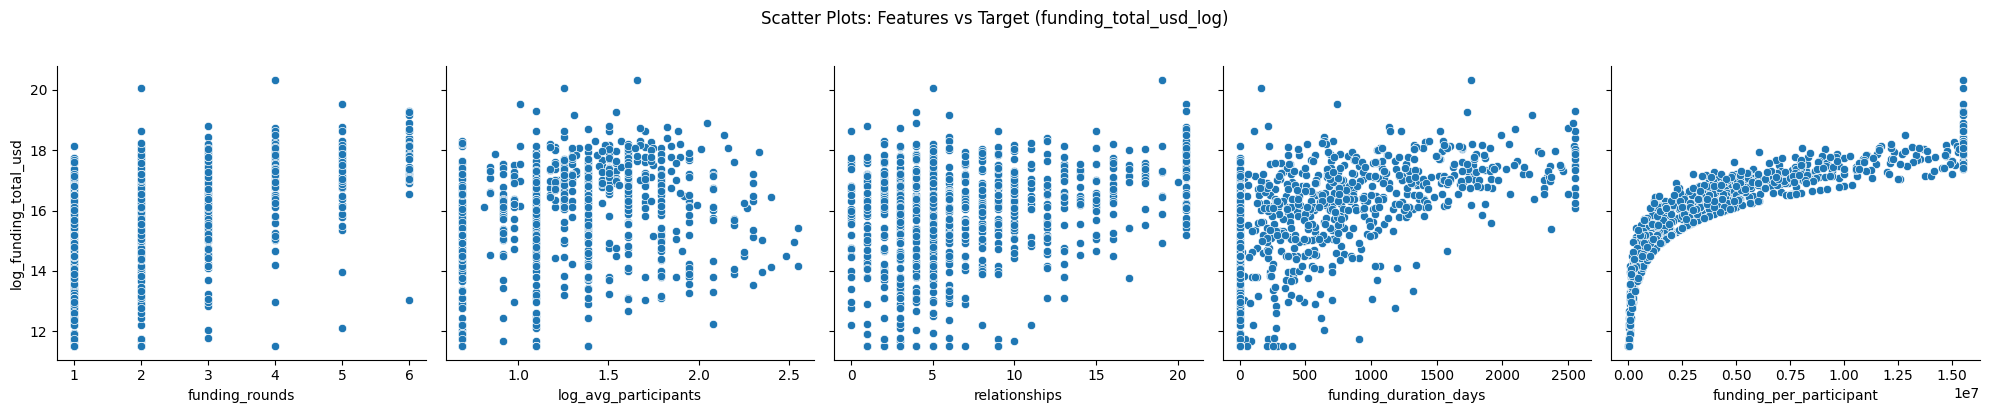

In [37]:
# Combine features and target for plotting
plot_data = pd.concat([X, y], axis=1)

# Create scatter plots
sns.pairplot(
    plot_data,
    x_vars=X.columns,
    y_vars='log_funding_total_usd',
    kind='scatter',
    height=4,
    aspect=1
)

plt.suptitle("Scatter Plots: Features vs Target (funding_total_usd_log)", y=1.02)
plt.tight_layout()
plt.show()

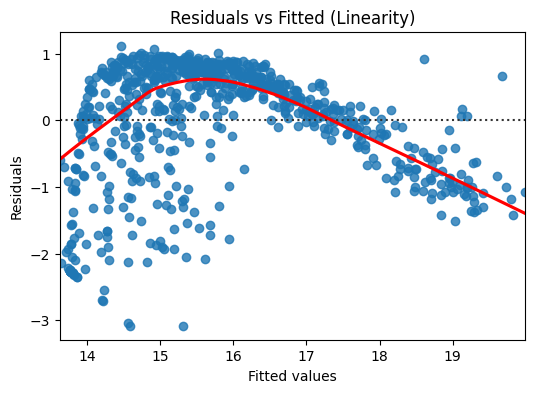

In [38]:
plt.figure(figsize=(6, 4))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted (Linearity)')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


✅ Interpretation:
Good: Residuals randomly scattered around zero → Linearity assumption is satisfied.

Bad: Clear curves, funnels, or patterns → Model may be missing non-linear relationships.


X-axis: Fitted (predicted) values from your regression model

Y-axis: Residuals (actual - predicted values)

Red Line: LOESS (smooth curve) fit to detect pattern in residuals

Ideal Shape (if linearity holds): A random scatter around the horizontal line at 0, with no pattern

❌ What This Plot Shows:
The red LOESS line curves downward.

There is a clear non-random pattern in the residuals.

The residuals are not evenly spread around 0, indicating model bias.

The red line is curved, not flat along the 0 residual line.

This suggests a non-linear relationship between the predictors and the target variable.

Ideally, residuals should be randomly scattered around zero without any systematic pattern.

The parabolic shape of the red line indicates that a linear model may not be appropriate.




### 2. Multicollinearity (VIF)

In [39]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("🔁 VIF:\n", vif)

🔁 VIF:
                   Variable        VIF
0           funding_rounds  10.633586
1     log_avg_participants   4.221209
2            relationships   3.149286
3    funding_duration_days   5.082425
4  funding_per_participant   3.009719


#### VIF Value	Interpretation:<br>Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other.
##### < 5	&nbsp;&nbsp;&nbsp;No serious multicollinearity ✅<br>
##### 5–10&nbsp;&nbsp;&nbsp;Moderate concern ⚠️<br>
##### > 10&nbsp;&nbsp;&nbsp;Serious multicollinearity ❌<br><br>

### 3. Normality of Residuals

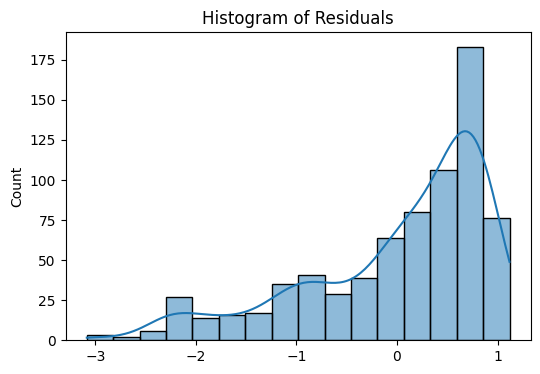

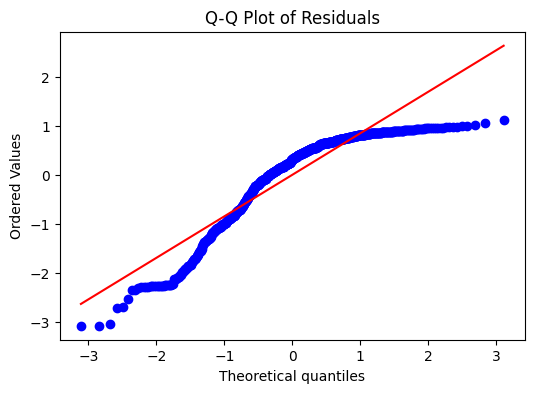

📊 Shapiro-Wilk Test: W=0.8644, p-value=0.0000 -> Not normal


In [40]:
plt.figure(figsize=(6, 4))
sns.histplot(model.resid, kde=True)
plt.title('Histogram of Residuals')
plt.show()
plt.figure(figsize=(6, 4))
#Q-Q Plot
probplot(model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()
# Shapiro-Wilk test (normality)
stat, p = shapiro(model.resid)
print(f'📊 Shapiro-Wilk Test: W={stat:.4f}, p-value={p:.4f} -> {"Normal" if p>0.05 else "Not normal"}')

✅ Interpretation:
Histogram: Should resemble a bell curve (normal distribution).if histogram looks somewhat bell-shaped but is skewed, it means the residuals aren't perfectly normal 

Q-Q Plot: Points should lie on the diagonal line.(A Q-Q plot compares the distribution of your residuals to a normal distribution.)

Shapiro-Wilk Test:

p > 0.05 → Residuals are normally distributed ✅

p < 0.05 → Residuals not normal ❌ (affects inference validity)

### 4.Homoscedasticity

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X_train_const = sm.add_constant(X_train_scaled)

bp_test = het_breuschpagan(model.resid, X_train_const)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print('Breusch-Pagan test:')
for name, value in zip(labels, bp_test):
    print(f'{name}: {value:.4f}')


Breusch-Pagan test:
Lagrange multiplier statistic: 65.8623
p-value: 0.0000
f-value: 14.3456
f p-value: 0.0000


✅ Interpretation:<br>
Homoscedasticity means that the variance of the residuals (errors) is constant across all levels of the independent variables in a regression model.
Why is constant variance of residuals (homoscedasticity) good in a regression model?It ensures reliable inference<br><br>
p > 0.05 → Variance of residuals is constant (homoscedasticity) ✅

p < 0.05 → Heteroscedasticity detected ❌ (violates assumption)

### 5. Autocorrelation (Durbin-Watson)

In [42]:
dw = sm.stats.durbin_watson(residuals)
print(f'📐 Durbin-Watson: {dw:.4f} (Ideal ~2)')


📐 Durbin-Watson: 1.8233 (Ideal ~2)


Autocorrelation refers to the correlation of residuals (errors) with each other over time or order.

✅ In a good regression model:
Residuals (errors) should be independent — meaning:

The error you make on one observation should not influence the error you make on another.If residuals influence each other, your model is biased in estimating standard errors.

Value ≈ 2 → No autocorrelation

< 2 → Positive autocorrelation

2 → Negative autocorrelation

In [ ]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)  # use transform here

# Fit linear regression on polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict
y_pred = model_poly.predict(X_test_poly)

# Print intercept and coefficients
print("Intercept:", model_poly.intercept_)
poly_feature_names = poly.get_feature_names_out(input_features=X.columns)

print("Coefficients:")
for feature, coef in zip(poly_feature_names, model_poly.coef_):
    print(f"  {feature}: {coef}")

# Evaluate
from sklearn.metrics import r2_score, mean_squared_error
print("R-squared on test set:", r2_score(y_test, y_pred))
print("MSE on test set:", mean_squared_error(y_test, y_pred))


Intercept: 16.471546456386097
Coefficients:
  funding_rounds: -0.05951008540597423
  log_avg_participants: 0.4467323452051133
  relationships: 0.1092265798465313
  funding_duration_days: 0.0570170690471335
  funding_per_participant: 2.022236759331461
  funding_rounds^2: 0.013396694636079242
  funding_rounds log_avg_participants: -0.020489133278099272
  funding_rounds relationships: 0.02355471828104591
  funding_rounds funding_duration_days: -0.0025096160128279324
  funding_rounds funding_per_participant: 0.08070956165954321
  log_avg_participants^2: -0.06615286857447492
  log_avg_participants relationships: -0.002549371132722958
  log_avg_participants funding_duration_days: -0.0043607417779766115
  log_avg_participants funding_per_participant: -0.060514196197795536
  relationships^2: 0.002324910348062609
  relationships funding_duration_days: -0.060799089405586114
  relationships funding_per_participant: -0.0559738867790284
  funding_duration_days^2: 0.007211220075613756
  funding_dura